# Global Processing using the Hough Transform (HT)

`Task # 01 Apply the Hough Tranform (HT) on a color image for detecting straight lines.`

*   Write your observations by changing the threshold on the accumulation votes.

In [19]:
# Import necessary libraries/packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# For compatibility with both local and Colab environments
try:
    from google.colab.patches import cv2_imshow
    COLAB = True
except ImportError:
    COLAB = False

def show_image(img, title='', cmap=None):
    if COLAB:
        cv2_imshow(img)
    else:
        plt.figure(figsize=(8,6))
        if len(img.shape) == 3:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap=cmap or 'gray')
        if title:
            plt.title(title)
        plt.axis('off')
        plt.show()

# Create output_images directory if it doesn't exist
os.makedirs('output_images', exist_ok=True)

In [20]:
# Load your input image(s)
image_path = 'image.jpg'
if not os.path.exists(image_path):
    try:
        import gdown
        url = 'https://drive.google.com/uc?id=1SYPlE-N9TqRrZ7nFcixBfgFQ7mAFyH4L'
        gdown.download(url, image_path, quiet=False)
    except ImportError:
        print(f"Image not found at {image_path}. Please download manually or install gdown: pip install gdown")
        raise

# Read the image
img = cv2.imread(image_path)
if img is None:
    raise ValueError(f"Failed to read image at {image_path}")
cv2.imwrite('output_images/input_image.jpg', img)

True

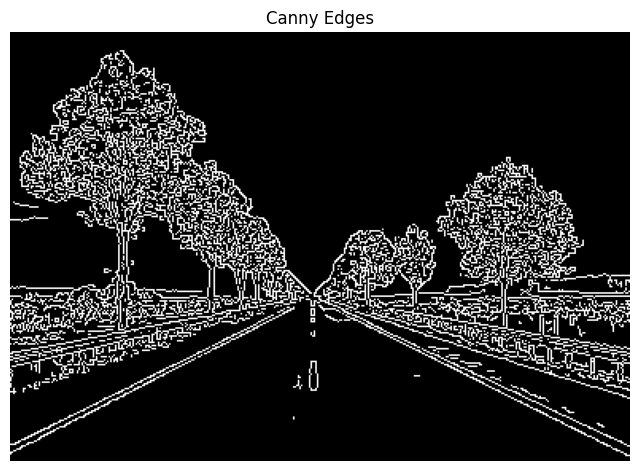

True

In [21]:
# Resize image
img = cv2.resize(img, (390, 270), interpolation = cv2.INTER_LINEAR)

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image [Very Important preprocessing task]
# This will give a single-pixel thick edges
# Change the Lower and Upper thresholds and observe the changes
edges = cv2.Canny(gray, 100, 150, apertureSize=3)

show_image(edges, 'Canny Edges', cmap='gray')
cv2.imwrite('output_images/canny_edges.png', edges)

**Descrption:** Apply the HT technique for Line detection.

In [22]:
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 175)
 # Accumulator threshold =350.


**Description:** Draw the detected straight lines

In [23]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
lines = np.array(lines)

print(lines.shape)

for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


(5, 1, 2)


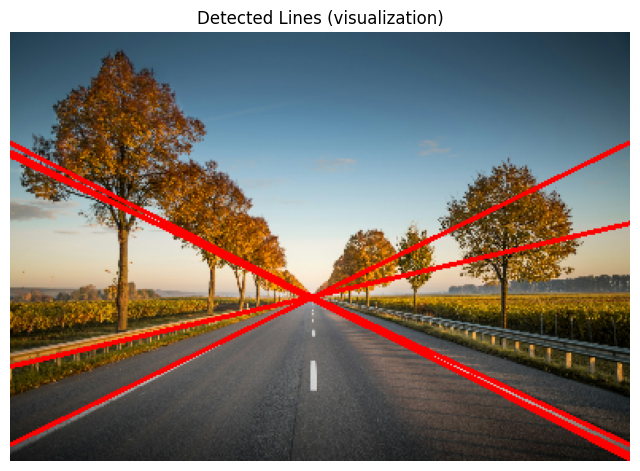

True

In [24]:
show_image(img, 'Detected Lines (visualization)')
cv2.imwrite('output_images/detected_lines_visualization.png', img)

`Task # 02 Generate the Hough/Accumulator Space using the rho-theta parameters.` **[Complete This Task]**

a. Display the Hough/Accumulator space.

In [25]:
# Code here
height, width = edges.shape
diag_len = int(np.sqrt(height**2 + width**2))
rhos = np.arange(-diag_len, diag_len + 1, 1)
thetas = np.deg2rad(np.arange(-90, 90, 1))
accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
ys, xs = np.nonzero(edges)

In [26]:
for i in range(len(xs)):
    x = xs[i]
    y = ys[i]

    for t_idx in range(len(thetas)):
        theta = thetas[t_idx]

        rho = int(round(x * np.cos(theta) + y * np.sin(theta)))

        rho_idx = rho + diag_len  # shift index to positive

        accumulator[rho_idx, t_idx] += 1


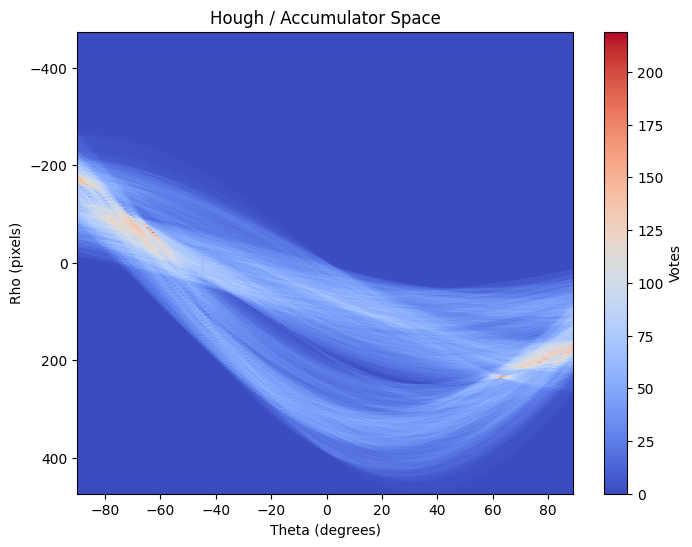

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(
    accumulator,
    cmap='coolwarm',
    aspect='auto',
    extent=[
        np.rad2deg(thetas[0]),
        np.rad2deg(thetas[-1]),
        rhos[-1],
        rhos[0]
    ]
)

plt.xlabel("Theta (degrees)")
plt.ylabel("Rho (pixels)")
plt.title("Hough / Accumulator Space")
plt.colorbar(label="Votes")

plt.savefig('output_images/hough_accumulator_space.png', bbox_inches='tight')
plt.show()


`Task # 03 Display the detected straight lines` **[Complete This Task]**

a. Apply the Threshold on to the parameter space, and list the line parameters

b. Draw the lines on the input image.

** Write Discussion based on your findings **

In [28]:
# Code here.
# Threshold as percentage of maximum votes
threshold = 0.8 * np.max(accumulator)

print("accumulator max value:", np.max(accumulator))
print("threshold used:", threshold)


accumulator max value: 219
threshold used: 175.20000000000002


In [29]:
detected_lines = []

for rho_idx in range(accumulator.shape[0]):
    for theta_idx in range(accumulator.shape[1]):
        if accumulator[rho_idx, theta_idx] >= threshold:
            rho = rhos[rho_idx]
            theta = thetas[theta_idx]
            detected_lines.append((rho, theta))

print("Detected Lines (rho, theta):")
for i, (rho, theta) in enumerate(detected_lines):
    print(f"Line {i+1}: rho = {rho:.2f}, theta = {np.rad2deg(theta):.2f} degrees")



Detected Lines (rho, theta):
Line 1: rho = -71.00, theta = -65.00 degrees
Line 2: rho = -68.00, theta = -64.00 degrees
Line 3: rho = -62.00, theta = -63.00 degrees
Line 4: rho = -61.00, theta = -63.00 degrees
Line 5: rho = 205.00, theta = 77.00 degrees
Line 6: rho = 233.00, theta = 64.00 degrees


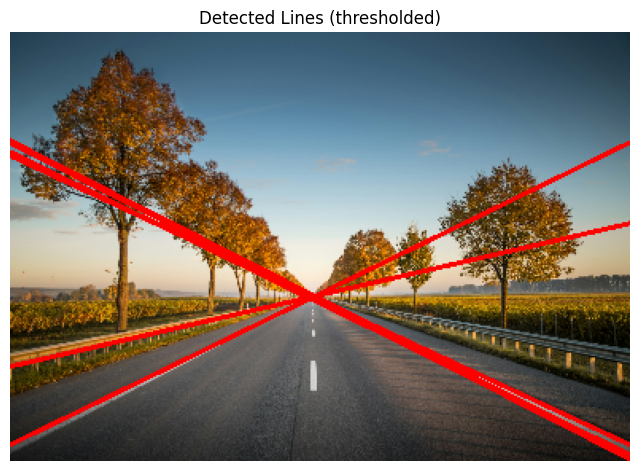

True

In [30]:
img_lines = img.copy()

for rho, theta in detected_lines:
    a = np.cos(theta)
    b = np.sin(theta)

    x0 = a * rho
    y0 = b * rho

    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

show_image(img_lines, 'Detected Lines (thresholded)')
cv2.imwrite('output_images/detected_lines_thresholded.png', img_lines)

`Task # 04 Write your own code to detect circles of fixed/any radius in a 2D image. `
**[Home Assignment]**

a. Detect the edges (use Canny edge detection algorithm)

b. Apply HT for Circule detection.

c. Diplay the accumulation space.

d. Draw the detected circles on top of the input image.

# Code here.

** Write Discussion based on your findings **

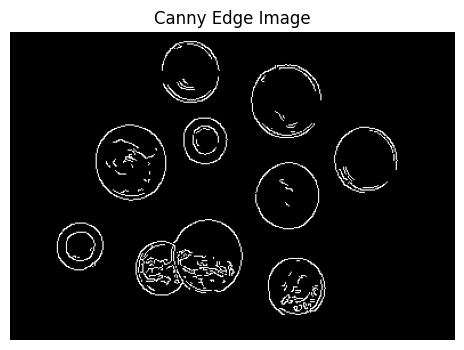

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Read and preprocess image
# -----------------------------
circle_image_path = 'HoughCircles.jpg'
if not os.path.exists(circle_image_path):
    try:
        import gdown
        url = 'https://drive.google.com/uc?id=1DlJOsGmg9XBgD7-EmJySk5V9qo_RjcNb'
        gdown.download(url, circle_image_path, quiet=False)
    except ImportError:
        print(f"Image not found at {circle_image_path}. Please download manually or install gdown: pip install gdown")
        raise

img = cv2.imread(circle_image_path)
if img is None:
    raise ValueError(f"Failed to read image at {circle_image_path}")
cv2.imwrite('output_images/input_circle_image.jpg', img)
img = cv2.resize(img, (390, 270))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# a) Edge Detection using Canny
edges = cv2.Canny(gray, 100, 150)

fig, ax = plt.subplots(figsize=(6, 4))
ax.imshow(edges, cmap='gray')
ax.set_title("Canny Edge Image")
ax.axis('off')
plt.savefig('output_images/canny_edge_image_circles.png', bbox_inches='tight')
plt.show()


In [32]:
# -----------------------------
# 2. Hough Transform for Circles (Fixed Radius)
# -----------------------------

height, width = edges.shape
radius = 30   # <<< change this value as needed

accumulator = np.zeros((height, width), dtype=np.uint64)

ys, xs = np.nonzero(edges)

for i in range(len(xs)):
    x = xs[i]
    y = ys[i]

    for theta in range(0, 360, 5):  # step=5 for speed
        t = np.deg2rad(theta)
        a = int(x - radius * np.cos(t))
        b = int(y - radius * np.sin(t))

        if 0 <= a < width and 0 <= b < height:
            accumulator[b, a] += 1


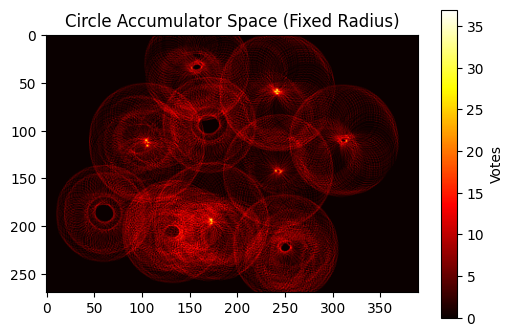

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(accumulator, cmap='hot')
ax.set_title("Circle Accumulator Space (Fixed Radius)")
plt.colorbar(im, ax=ax, label="Votes")
plt.savefig('output_images/circle_accumulator_space.png', bbox_inches='tight')
plt.show()


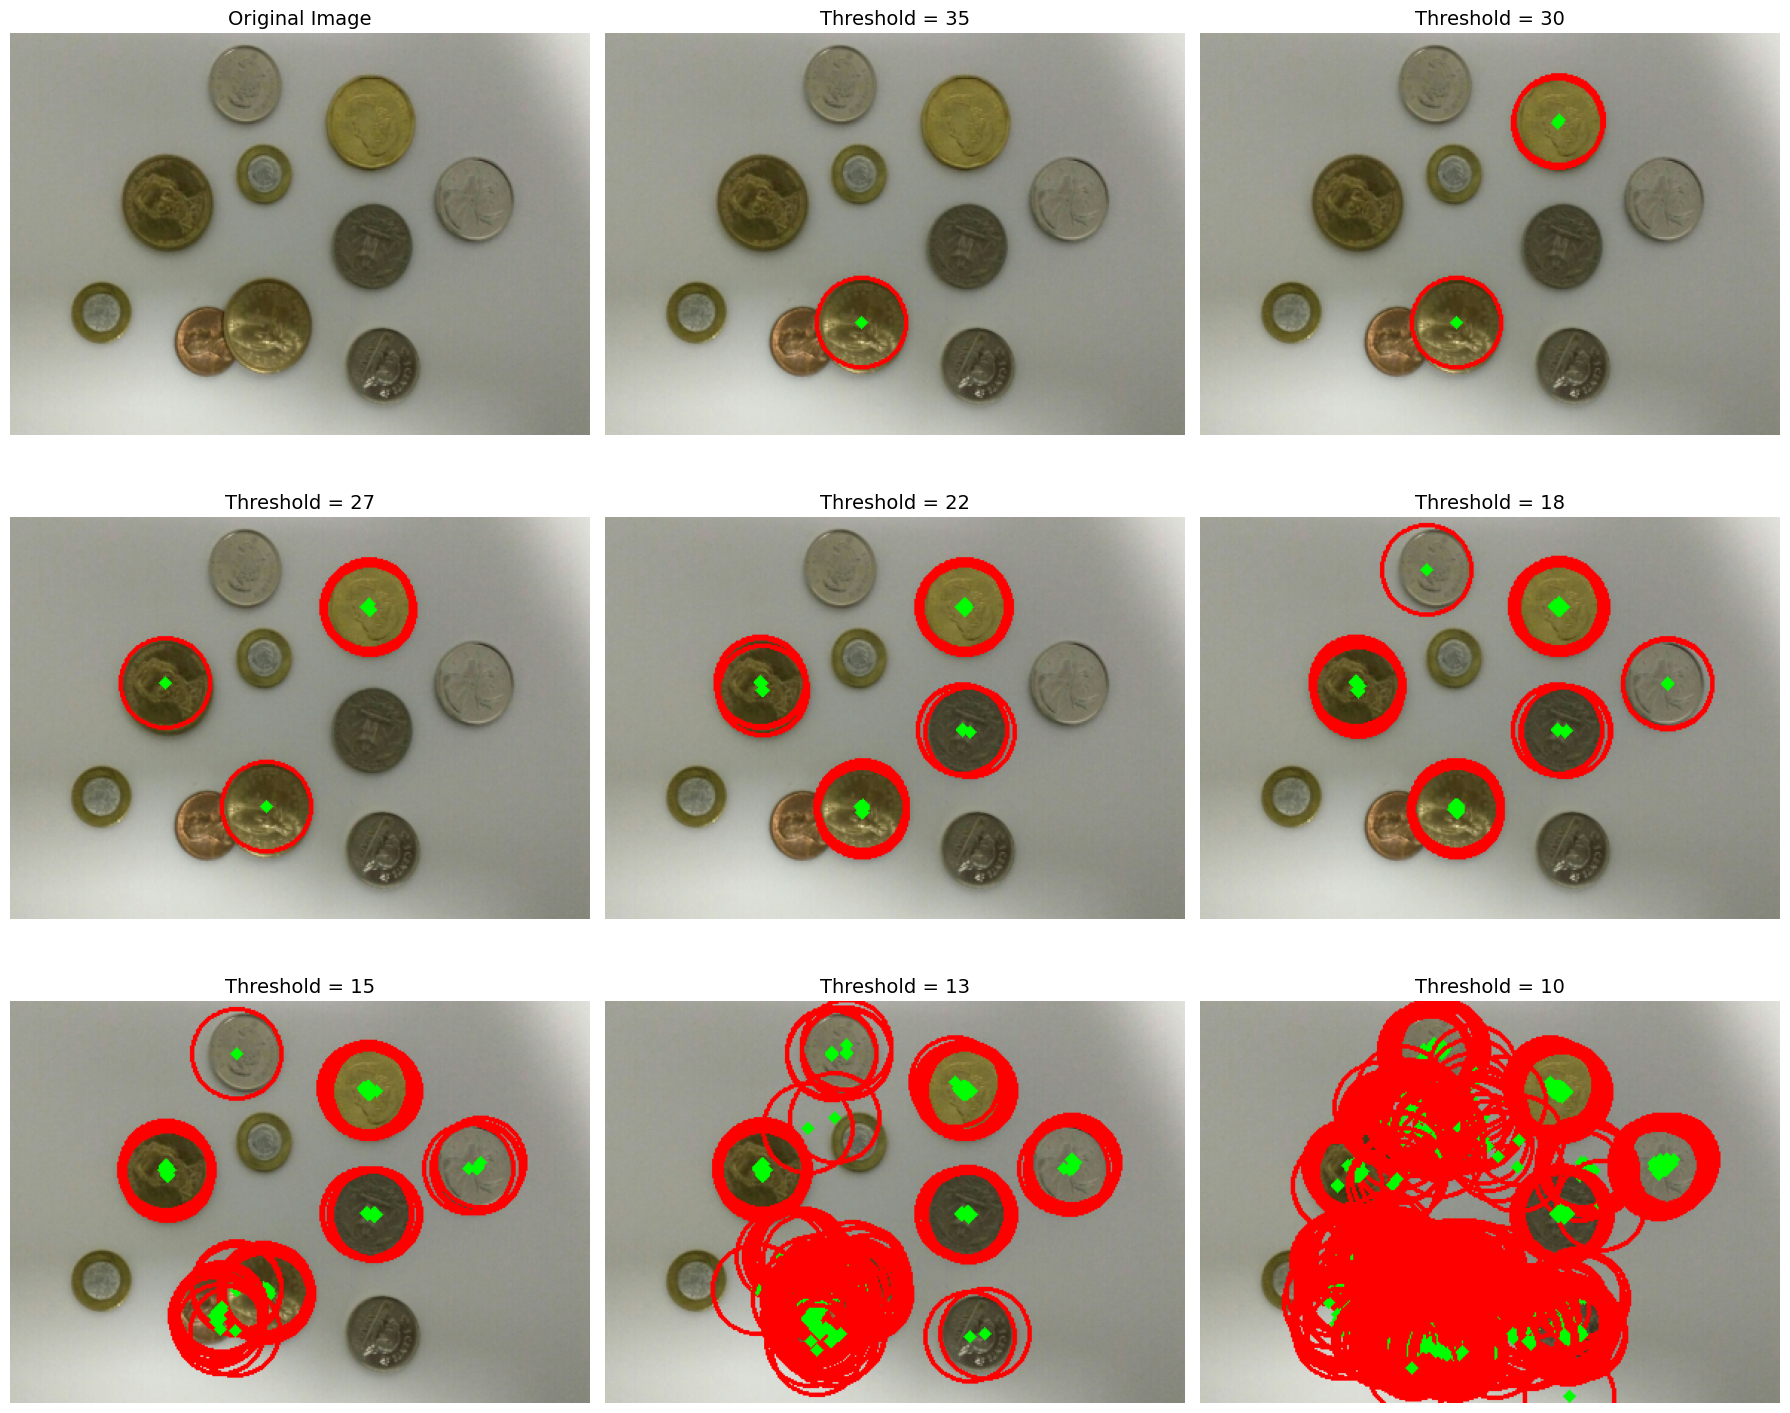

<Figure size 640x480 with 0 Axes>

In [ ]:
# Threshold values
thresholds = [35, 30, 27, 22, 18, 15, 13, 10]

results = []

for threshold in thresholds:
    centers = []

    # Detect centers for this threshold
    for y in range(height):
        for x in range(width):
            if accumulator[y, x] > threshold:
                centers.append((x, y))

    # Draw circles
    img_copy = img.copy()
    for (x, y) in centers:
        cv2.circle(img_copy, (x, y), radius, (0, 0, 255), 2)
        cv2.circle(img_copy, (x, y), 2, (0, 255, 0), 3)

    # Convert BGR → RGB for matplotlib
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    results.append((threshold, img_copy))


# ----------------
# Display
# ----------------
fig = plt.figure(figsize=(18, 15))

# Original image
plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image", fontsize=14)
plt.axis('off')

# Plot threshold images
for i, (threshold, image) in enumerate(results):
    plt.subplot(3, 3, i + 2)
    plt.imshow(image)
    plt.title(f"Threshold = {threshold}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.savefig('output_images/circle_detections_thresholds.png', bbox_inches='tight')
plt.show()
